In [1]:
## Libraries required for data analysis
import numpy as np 
import pandas as pd 
import os
import seaborn as sns 
sns.set(style = "whitegrid")

import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing

In [2]:
#To find current working directory
curr_wd = os.getcwd() 

train_path= os.path.join(curr_wd,'train.csv') 
train = pd.read_csv(filepath_or_buffer=train_path,sep=',') 

test_path= os.path.join(curr_wd,'test.csv') 
test = pd.read_csv(filepath_or_buffer=test_path,sep=',') 

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Checking for missing values

In [5]:
#to calculate the percentage of the missing values
percent_missing = train.isnull().sum()*100/len(train)
x = list(percent_missing)
train_missing_values = pd.DataFrame({'column name': train.columns, 'percent missing %': x})
train_missing_values

,column name,percent missing %
0,PassengerId,0.000000
1,Survived,0.000000
2,Pclass,0.000000
3,Name,0.000000
4,Sex,0.000000
5,Age,19.865320
6,SibSp,0.000000
7,Parch,0.000000
8,Ticket,0.000000
9,Fare,0.000000


We will drop the Cabin column as it has 77% missing values and the rest we will replace with median

In [6]:
percent_missing = test.isnull().sum()*100/len(test)
x = list(percent_missing)
test_missing_values = pd.DataFrame({'column name': test.columns, 'percent missing %': x})
test_missing_values

,column name,percent missing %
0,PassengerId,0.000000
1,Pclass,0.000000
2,Name,0.000000
3,Sex,0.000000
4,Age,20.574163
5,SibSp,0.000000
6,Parch,0.000000
7,Ticket,0.000000
8,Fare,0.239234
9,Cabin,78.229665


Both data contain Nan Values which needs to be treated

# Data Cleaning

### Data cleaning needs to be done with Age, Cabin and Embarked columns

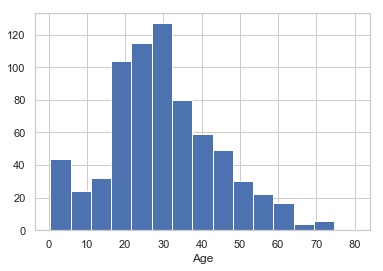

In [7]:
def histogram():
    ax = train['Age'].hist(bins = 15, stacked = True)
    ax.set(xlabel='Age')
histogram()

Since the age is rightly skewed it might give us biased results by filling ages older ones then expected. I am using median method toresolve this issue.

Embarked has 0.22% of missing data which can be imputed with most people boarded

S    644
C    168
Q     77
Name: Embarked, dtype: int64


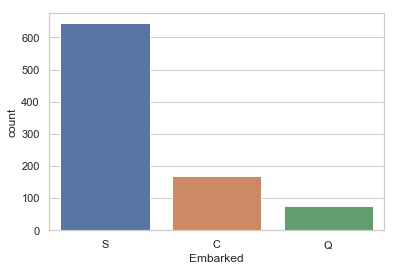

In [8]:
print(train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train)
plt.show()

We can impute embarked value with most people boarded i.e. S

In [9]:
train_data = train.copy()

train_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
train_data.drop('Ticket', axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)
train_data.Sex[train_data.Sex == 'male'] = 0
train_data.Sex[train_data.Sex == 'female'] = 1


#Cleaning test data as well
test_data = test.copy()

test_data["Age"].fillna(test["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(test["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)
test_data.Sex[test_data.Sex == 'male'] = 0
test_data.Sex[test_data.Sex == 'female'] = 1

In [10]:
## Replacing Embarked values of the train dataset
train_data.Embarked[train_data.Embarked == 'S'] = 0
train_data.Embarked[train_data.Embarked == 'C'] = 1
train_data.Embarked[train_data.Embarked == 'Q'] = 2

## Replacing Embarked values of the test dataset
test_data.Embarked[test_data.Embarked == 'S'] = 0
test_data.Embarked[test_data.Embarked == 'C'] = 1
test_data.Embarked[test_data.Embarked == 'Q'] = 2

In [11]:
train_data['Age'].round(0)
train_data['Age'].describe()
def age(row):
    if (row['Age'] > 0) & (row['Age'] < 10):
        return 0
    if (row['Age'] >= 10) & (row['Age'] < 20):
        return 1
    if (row['Age'] >= 20) & (row['Age'] < 30):
        return 2
    if (row['Age'] >= 30) & (row['Age'] < 40):
        return 3
    if (row['Age'] >= 40) & (row['Age'] < 50):
        return 4
    if (row['Age'] >= 50) & (row['Age'] < 60):
        return 5
    if (row['Age'] >= 60):
        return 6
    return

train_data['Age_range_value'] = train_data['Age']
train_data['Age_range_value'] = train_data.apply(lambda row: age(row), axis = 1)
train_data= train_data.drop(['Age'], axis=1)

In [12]:
test_data['Age'].round(0)
test_data['Age'].describe()
def age(row):
    if (row['Age'] > 0) & (row['Age'] < 10):
        return 0
    if (row['Age'] >= 10) & (row['Age'] < 20):
        return 1
    if (row['Age'] >= 20) & (row['Age'] < 30):
        return 2
    if (row['Age'] >= 30) & (row['Age'] < 40):
        return 3
    if (row['Age'] >= 40) & (row['Age'] < 50):
        return 4
    if (row['Age'] >= 50) & (row['Age'] < 60):
        return 5
    if (row['Age'] >= 60):
        return 6
    return

test_data['Age_range_value'] = test_data['Age']
test_data['Age_range_value'] = test_data.apply(lambda row: age(row), axis = 1)
test_data= test_data.drop(['Age'], axis=1)

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_range_value
0,1,0,3,0,1,0,7.2500,0,2
1,2,1,1,1,1,0,71.2833,1,3
2,3,1,3,1,0,0,7.9250,0,2
3,4,1,1,1,1,0,53.1000,0,3
4,5,0,3,0,0,0,8.0500,0,3


In [14]:
percent_missing = test_data.isnull().sum()*100/len(test_data)
x = list(percent_missing)
test_missing_values = pd.DataFrame({'column name': test_data.columns, 'percent missing %': x})
test_missing_values

,column name,percent missing %
0,PassengerId,0.0
1,Pclass,0.0
2,Sex,0.0
3,SibSp,0.0
4,Parch,0.0
5,Fare,0.0
6,Embarked,0.0
7,Age_range_value,0.0


In [15]:
percent_missing = train_data.isnull().sum()*100/len(train_data)
x = list(percent_missing)
train_missing_values = pd.DataFrame({'column name': train_data.columns, 'percent missing %': x})
train_missing_values

,column name,percent missing %
0,PassengerId,0.0
1,Survived,0.0
2,Pclass,0.0
3,Sex,0.0
4,SibSp,0.0
5,Parch,0.0
6,Fare,0.0
7,Embarked,0.0
8,Age_range_value,0.0


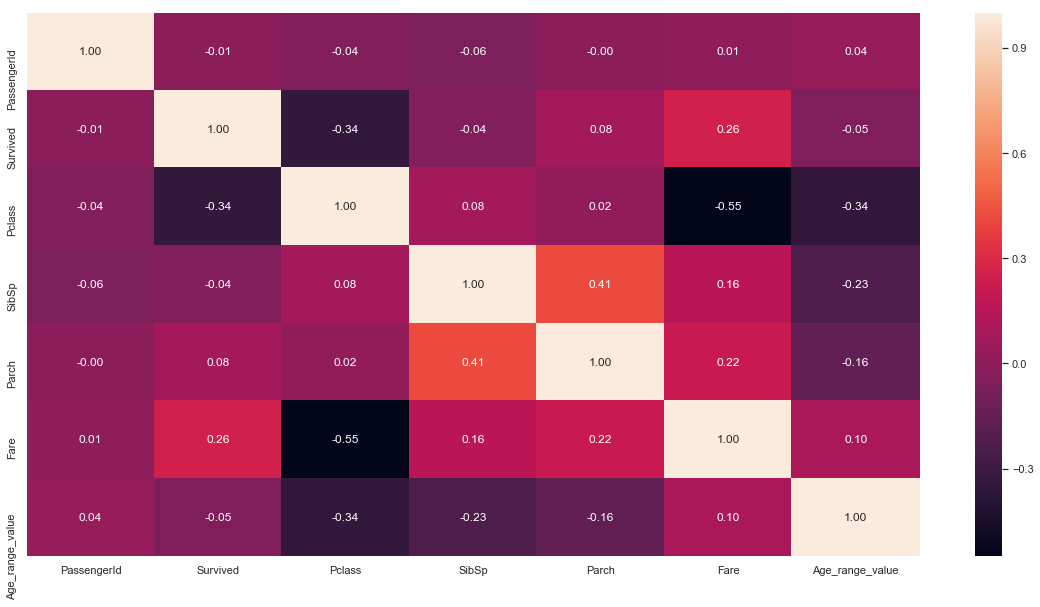

In [16]:
# to check the if there is any multi colinearlity in data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f")
plt.show()

Unlike in previous assignment where we converted Pclass and Sibsp into categorical variable. Here, we will use those variable see the collinearity of all the variables and check if there is any high collinear among the variables. We will then apply PCA on the data to get better results. I have also converted the Age columns into a range for better results. 

In the Heat map itself we could see SibSp and Parch have collinearity with 41%. Also Fare and Pclass with 55%. We will use PCA on these data points.

# EDA

The graph shows that childrens were the most survivors among the passengers

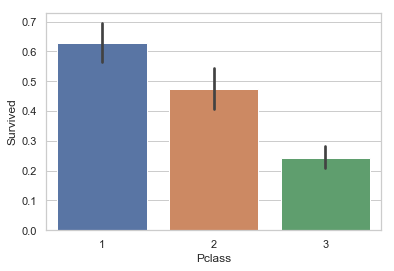

In [17]:
sns.barplot('Pclass', 'Survived', data=train_data)
plt.show()

Class 1 was the safest among the passengers

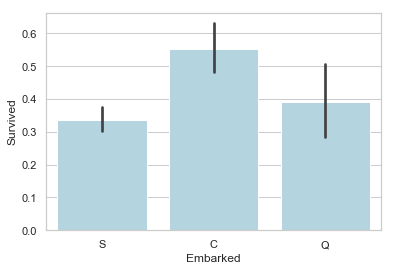

In [18]:
sns.barplot('Embarked', 'Survived', data=train, color="lightblue")
plt.show()

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. 

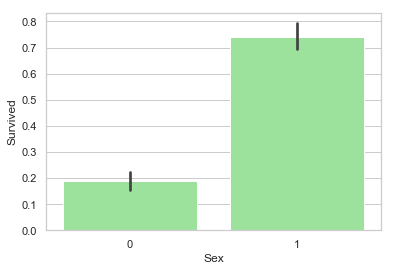

In [19]:
sns.barplot('Sex', 'Survived', data=train_data, color="lightgreen")
plt.show()

It is clearly evident that females were the highest among the survivors

In [20]:
#filling the average value in place of N/A in Fare 
Av_Fare = test_data.Fare.mean()
test_data['Fare']=test_data.Fare.fillna(Av_Fare)

In [21]:
train_data.shape

(891, 9)

In [22]:
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_range_value
0,892,3,0,0,0,7.8292,2,3
1,893,3,1,1,0,7.0000,0,4
2,894,2,0,0,0,9.6875,2,6
3,895,3,0,0,0,8.6625,0,2
4,896,3,1,1,1,12.2875,0,2


In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_range_value
0,1,0,3,0,1,0,7.2500,0,2
1,2,1,1,1,1,0,71.2833,1,3
2,3,1,3,1,0,0,7.9250,0,2
3,4,1,1,1,1,0,53.1000,0,3
4,5,0,3,0,0,0,8.0500,0,3


# Applying Decision Tree Algorithm

In [24]:
X_train = train_data.drop(['Survived'], axis=1)
Y_train = train_data[['Survived']]
#X_test  = test_data
Y_train.shape

(891, 1)

In [25]:
clf = DecisionTreeClassifier(random_state=0)
scoring_parameters = {'acc': 'accuracy',
                      'prec_macro': 'precision_macro',
                      'rec_macro': 'recall_macro',
                      'f1_macro': 'f1_macro'}
score_values = cross_validate(clf, X_train, Y_train, cv=10, scoring=scoring_parameters)

print ('The Accuracy score is : %.3f' % score_values['test_acc'].mean())
print ('The Precisoin score is : %.3f' % score_values['test_prec_macro'].mean())
print ('The Recall score is : %.3f' % score_values['test_rec_macro'].mean())
print ('The F1 score is : %.3f' % score_values['test_f1_macro'].mean())

The Accuracy score is : 0.737
The Precisoin score is : 0.740
The Recall score is : 0.732
The F1 score is : 0.724


We get around 73.7% accuracy on applying Decision tree on the data

# Implementing confusion matrix

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train, Y_train, test_size=0.3)
target = ['Dead (0)', 'Survived (1)'] 
#We use target value for decision tree classifier

In [27]:
#X1_train.shape
y1_train.shape

(623, 1)

In [28]:
from sklearn.metrics import precision_score, recall_score
clf = DecisionTreeClassifier()
clf.fit(X1_train,y1_train)
predictions = clf.predict(X1_test)
print("Classification report \n",metrics.classification_report(y1_test,predictions, target_names=target, digits=3))

Classification report 
               precision    recall  f1-score   support

    Dead (0)      0.829     0.794     0.811       165
Survived (1)      0.691     0.738     0.714       103

    accuracy                          0.772       268
   macro avg      0.760     0.766     0.762       268
weighted avg      0.776     0.772     0.774       268



In [29]:
##  With the help of Confusion Matrix we can find the true positive, true negative, false positive and false negative.
confusion_matrix = confusion_matrix(y1_test, predictions)
print(confusion_matrix)

[[131  34]
 [ 27  76]]


True Positive:
Interpretation: You predicted positive and it’s true. 124 is correctly predicted.

True Negative:
Interpretation: You predicted negative and it’s true. 72 correctly predicted that it is not true.

37 and 35 is not correctly predicted.

### K-NN clustering

In [43]:
X = train_data.drop(['Survived','PassengerId'], axis=1)
Y = train_data[['Survived']]

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=7,train_size=0.7)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
predictions=clf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.7164179104477612


In [35]:
result=clf.predict(X_test)
print(result)

[0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0
 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0
 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1
 1 0 0 1 1 1 0 0 0]


Here, the accuracy is 71.6% with KNN which is much lesser compared to decision tree 74% and logistic regression 79.5%

# Applying SVM to the model

In [48]:
from sklearn.model_selection import cross_val_score, KFold


kf = KFold(n_splits=10,random_state=1)
print(X_train.head())
print(Y_train.head())

     Pclass Sex  SibSp  Parch     Fare Embarked  Age_range_value
192       3   1      1      0   7.8542        0                1
191       2   0      0      0  13.0000        0                1
714       2   0      0      0  13.0000        0                5
532       3   0      1      1   7.2292        1                1
132       3   1      1      0  14.5000        0                4
     Survived
192         1
191         0
714         0
532         0
132         0


In [46]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(C = 30, gamma = 0.01)
svc.fit(X_train,Y_train) 

acc_SVM = cross_val_score(svc,X_train,Y_train,cv=kf)
print(acc_SVM.mean())

0.8170250896057348


Here, SVM performs the best among all the algorithm. Giving 81% accuracy. 
#### Compared with the rest.
#### Decision Tree: 73.7%
#### Logistic Regression: 79.5%
#### KNN : 71%